In [1]:
import data.readers.csv as csv_reader
import transporters.optical_functions_factory as optical_functions_factory
import os
import visualization.optics_parameter_visualisation as optical_function_plotter
import seaborn as sns
from data.parameters_names import ParametersNames as Parameters
from data.grid_configuration import GeometricalCoordinatesGridConfiguration, CanonicalCoordinatesGridConfiguration
from transporters.ptc_twiss.configuration import PtcTwissConfiguration
sns.set_style("whitegrid")

In [2]:
# Parameters of bunch
x_mean = 0
sigma_x = 0
theta_x_mean = 140e-6
sigma_theta_x = 0
y_mean = 0
sigma_y = 0
theta_y_mean = 0
sigma_theta_y = 0
pt_mean = -0.075
sigma_pt = 0.075

number_of_x_values = 1
number_of_theta_x_values = 1
number_of_y_values = 1
number_of_theta_y_values = 1
number_of_pt_values = 4

grid_configuration = CanonicalCoordinatesGridConfiguration.from_sigma(x_mean, sigma_x, number_of_x_values,
                                                        theta_x_mean, sigma_theta_x, number_of_theta_x_values,
                                                        y_mean, sigma_y, number_of_y_values,
                                                        theta_y_mean, sigma_theta_y, number_of_theta_y_values,
                                                        pt_mean, sigma_pt, number_of_pt_values)
particles = grid_configuration.generate_grid()

In [3]:
path_to_optics = "path_to_folder_with_optics"
optic_folder_name = "2016"
xml_file_name = "configuration_reconst_beam1.xml"
path_to_xml_file = os.path.join(path_to_optics, optic_folder_name, xml_file_name)

ptc_twiss_configuration = PtcTwissConfiguration.get_configuration_from_file(path_to_xml_file, item_number=2, 
                                                                            if_filter_by_s=True)

d_x_function = optical_functions_factory.get_d_x(ptc_twiss_configuration)
d_x_from_ptc_twiss = d_x_function(particles)

In [4]:
csv_file_name = "pt_from_dx_values.csv"
path_to_csv_file = os.path.join(path_to_optics, optic_folder_name, csv_file_name)
csv_values = csv_reader.read_in(path_to_csv_file, Parameters.PT, Parameters.D_X)
csv_values.particles.T[1] /= 100

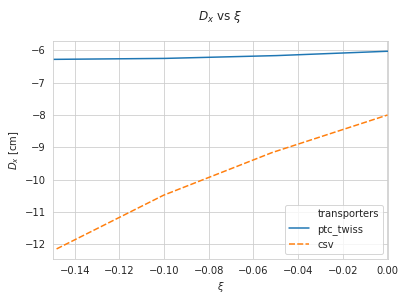

In [14]:
datasets = {
    "ptc_twiss": d_x_from_ptc_twiss,
    "csv": csv_values
}
optical_function_plotter.plot_optical_functions(datasets, Parameters.PT, Parameters.D_X)

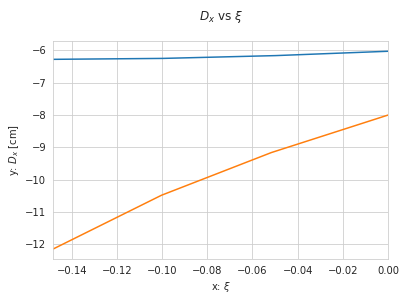

In [15]:
ax = d_x_from_ptc_twiss.plot(Parameters.PT, Parameters.D_X)
csv_values.plot(Parameters.PT, Parameters.D_X, ax=ax)